In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#step 01 Problem Statement :

Problem Statement : from the studnet CGP and IQ score calculate or predict its placement

In [202]:
path= '/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project /P06:Log_KNN_SVM/1:student_placement.csv'
#path1 = '/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project /P06:Log_KNN_SVM/3:Marketingcampaigns.csv'
df =pd.read_csv(path)
df.head()

,cgpa,iq,placement
0,5.14,83,0
1,5.28,83,0
2,5.01,83,0
3,5.44,84,0
4,5.34,85,0


#Step 02 Data undurstanding

- CGPA - its student Academic marks of subjets
- IQ - the studets intelectual capacity toward logical thinking
- Placement - its the whether student will select or no select in placement

Step No 03 Data Cleaing and wrangling

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       200 non-null    float64
 1   iq         200 non-null    int64  
 2   placement  200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB


**There id no missing values in dataset**

In [204]:
df.describe()

,cgpa,iq,placement
count,200.000000,200.000000,200.000000
mean,6.983400,101.995000,0.425000
std,1.624101,12.161599,0.495584
min,4.600000,83.000000,0.000000
25%,5.407500,91.000000,0.000000
50%,7.040000,102.000000,0.000000
75%,8.585000,113.000000,1.000000
max,9.300000,121.000000,1.000000


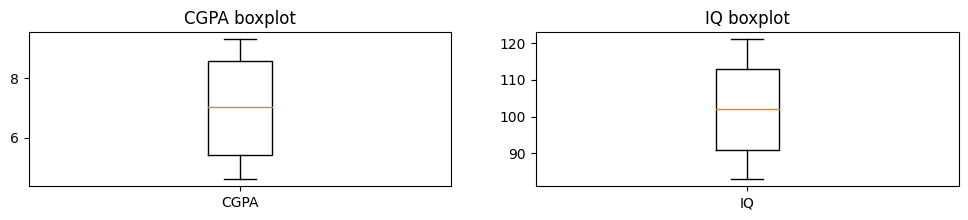

In [205]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.boxplot(df['cgpa'],labels=['CGPA'])
plt.title("CGPA boxplot")
plt.subplot(1,2,2)
plt.boxplot(df['iq'],labels=['IQ'])
plt.title("IQ boxplot")
plt.show()

**From the above plots, there are no Outliers in dataset**

#step 4 : EDA

In [206]:
df['placement'].value_counts()

0    115
1     85
Name: placement, dtype: int64

Text(0.5, 0, 'Placement or Not')

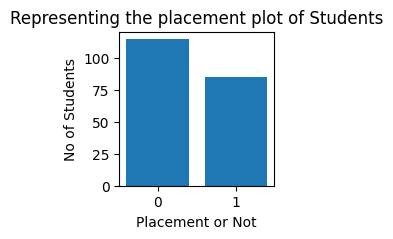

In [207]:
plt.figure(figsize=(2,2))
plt.bar(df['placement'].value_counts().index,df['placement'].value_counts().values)
plt.title("Representing the placement plot of Students")
plt.ylabel("No of Students")
plt.xlabel("Placement or Not")

In [208]:
df[df['cgpa']>9.0]

,cgpa,iq,placement
151,9.23,114,0
165,9.07,117,1
166,9.30,117,1
183,9.03,118,1
184,9.13,118,1
186,9.03,118,1
192,9.18,119,1
198,9.06,120,1
199,9.01,121,1


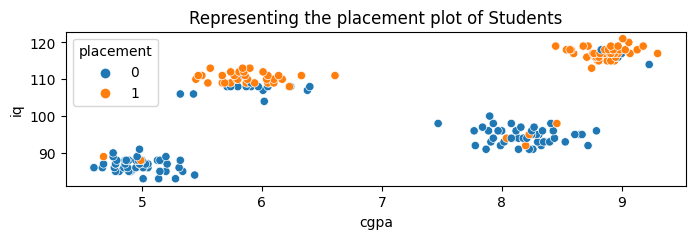

In [209]:
plt.figure(figsize=(8,2))
sns.scatterplot(data=df, x='cgpa',y='iq',hue='placement')
plt.title("Representing the placement plot of Students")
plt.show()

In [210]:
df.corr()

,cgpa,iq,placement
cgpa,1.000000,0.535301,0.297938
iq,0.535301,1.000000,0.764909
placement,0.297938,0.764909,1.000000


<Axes: title={'center': 'Correlation between input and output data'}>

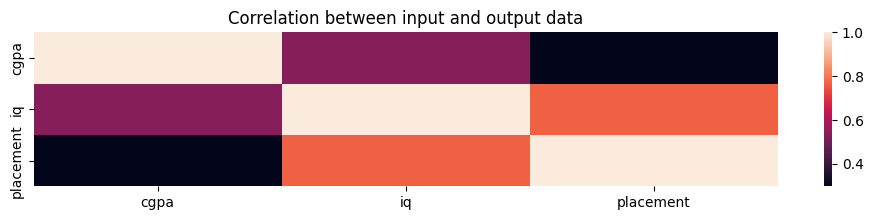

In [211]:
plt.figure(figsize=(12,2))
plt.title("Correlation between input and output data")
sns.heatmap(df.corr())

#Step 5 : Modelling
#Step 6 : Evoluation

In [212]:
X=df[['cgpa','iq']]
y=df['placement']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=16,test_size=0.3)

# Logistic Regression

In [214]:
#Model 01
model = LogisticRegression()
model.fit(X_train, y_train)

#Predict
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

#Evaluation
cross_validation = cross_val_score(model, X_test,ytest_pred, cv=5, scoring='accuracy').mean()
train_accuracy_score = accuracy_score(y_train,ytrain_pred)
test_accuracy_score = accuracy_score(y_test,ytest_pred)

print("cross_validation : ",cross_validation )
print("train_accuracy_score : ",train_accuracy_score)
print("test_accuracy_score : ",test_accuracy_score)

cross_validation :  0.9833333333333332
train_accuracy_score :  0.8785714285714286
test_accuracy_score :  0.85


In [215]:
print("confusion_matrix : \n", confusion_matrix(y_test, ytest_pred))
print("classification_report : \n",classification_report(y_test,ytest_pred))

confusion_matrix : 
 [[29  6]
 [ 3 22]]
classification_report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.79      0.88      0.83        25

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



# KNN

In [216]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)

#Predict
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

#Evaluation
cross_validation = cross_val_score(model1, X_test,ytest_pred, cv=5, scoring='accuracy').mean()
train_accuracy_score = accuracy_score(y_train,ytrain_pred)
test_accuracy_score = accuracy_score(y_test,ytest_pred)

print("cross_validation : ",cross_validation )
print("train_accuracy_score : ",train_accuracy_score)
print("test_accuracy_score : ",test_accuracy_score)

cross_validation :  0.9833333333333332
train_accuracy_score :  0.8785714285714286
test_accuracy_score :  0.85


In [217]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,11)),'p':[1,2]}
gscv_model =GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gscv_model.fit(X_train,y_train)
gscv_model.best_params_

{'n_neighbors': 5, 'p': 1}

In [218]:
model2 = KNeighborsClassifier(n_neighbors=5,p=1)
model2.fit(X_train, y_train)

#Predict
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

#Evaluation
cross_validation = cross_val_score(model2, X_test,ytest_pred, cv=5, scoring='accuracy').mean()
train_accuracy_score = accuracy_score(y_train,ytrain_pred)
test_accuracy_score = accuracy_score(y_test,ytest_pred)

print("cross_validation : ",cross_validation )
print("train_accuracy_score : ",train_accuracy_score)
print("test_accuracy_score : ",test_accuracy_score)

cross_validation :  0.9833333333333332
train_accuracy_score :  0.8785714285714286
test_accuracy_score :  0.85


In [219]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ytest_pred)
print(confusion_matrix(y_test,ytest_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,ytest_pred))

[[29  6]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.79      0.88      0.83        25

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



#SVM

In [220]:
model3 = SVC()
model3.fit(X_train, y_train)

#Predict
ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

#Evaluation
train_accuracy = model.score(X_train,ytrain_pred)
test_accuracy = model.score(X_test,ytest_pred)
cross_validation = cross_val_score(model3, X_test,ytest_pred, cv=5, scoring='accuracy').mean()

print("train_accuracy : ",train_accuracy )
print("test_accuracy : ",test_accuracy )
print("cross_validation : ",cross_validation )

train_accuracy :  1.0
test_accuracy :  1.0
cross_validation :  1.0


In [221]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {'C':[0.01,0.02,1,0.03,0.04,100],'kernel':['linear','rbf','sigmoid','poly']}
gscv_model =GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gscv_model.fit(X_train,y_train)
gscv_model.best_params_

{'C': 0.03, 'kernel': 'poly'}

In [222]:
model4 = SVC(C=0.03,kernel='poly')
model4.fit(X_train, y_train)

#Predict
ytrain_pred_vsm = model.predict(X_train)
ytest_pred_vsm = model.predict(X_test)

#Evaluation
train_accuracy = model.score(X_train,ytrain_pred_vsm)
test_accuracy = model.score(X_test,ytest_pred_vsm)
cross_validation = cross_val_score(model4, X_test,ytest_pred_vsm, cv=5, scoring='accuracy').mean()

print("train_accuracy : ",train_accuracy )
print("test_accuracy : ",test_accuracy )
print("cross_validation : ",cross_validation )
print("-"*100)
print("confusion_matrix : \n", confusion_matrix(y_test, ytest_pred_vsm))
print("-"*100)
print("classification_report : \n",classification_report(y_test,ytest_pred_vsm))

train_accuracy :  1.0
test_accuracy :  1.0
cross_validation :  1.0
----------------------------------------------------------------------------------------------------
confusion_matrix : 
 [[29  6]
 [ 3 22]]
----------------------------------------------------------------------------------------------------
classification_report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.79      0.88      0.83        25

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [223]:
print("confusion_matrix : \n", confusion_matrix(y_test, ytest_pred))
print("classification_report : \n",classification_report(y_test,ytest_pred))

confusion_matrix : 
 [[29  6]
 [ 3 22]]
classification_report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.79      0.88      0.83        25

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

